In [1]:
# Description: Plot Figure 6 (time series plots of the dominant vorticity balance terms)
#
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        April/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import open_dataset
import matplotlib.dates as mdates
from pandas import Timestamp

In [3]:
def snap_axes(ax1, ax2):
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()
    points1 = pos1.get_points()
    points2 = pos2.get_points()
    points2[1][1]=points1[0][1]
    pos2.set_points(points2)
    ax2.set_position(pos2)

In [4]:
# 800 m isobath******
# Length A-B = 3803 km
# Length WAP = 1841 km
# Length Weddell = 4889 km
# Length W-EA = 5796 km
# Length E-EA = 7786 km
# Length Ross = 3768 km
# Length circumpolar = 27318 km

Length_circ =   27318e3 # [m]
Length_AB =      3803e3 # [m]
Length_Weddell = 4889e3 # [m]
Length_WAP =     1841e3 # [m]
Length_WEA =     5796e3 # [m]
Length_EEA =     7786e3 # [m]
Length_Ross =    3768e3 # [m]

m3stoSv = 1e-6
lat = -65
omega = 7.292115e-5  # (1/s)
beta = 2*omega*np.cos(np.radians(lat))/6400e3 # [1/m/s]

In [5]:
plt.close('all')

terms = ['Ibetav', 'Icurlvdiff', 'Icurlhdiff', 'Istretchp', 'Ires', 'Icurlnonl']
segments = ['Amundsen-Bellingshausen', 'WAP', 'Weddell', 'W-EA', 'E-EA', 'Ross']
head_data = "../../data_reproduce_figs/"

# Circumpolar circulation terms.
fname = head_data+'circulation_terms_circumpolar.nc'
ds = open_dataset(fname)
t = ds['t']
years = [Timestamp('2005-01-01'), Timestamp('2006-01-01'), Timestamp('2007-01-01'), Timestamp('2008-01-01'), Timestamp('2009-01-01')]

No handles with labels found to put in legend.


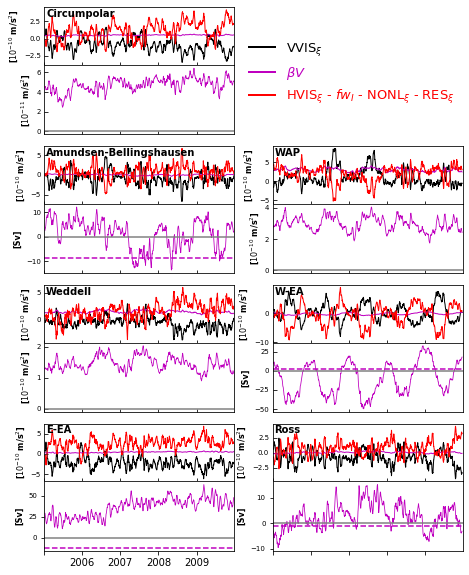

In [6]:
fig = plt.figure(figsize=(7.5, 10))

shp = (8, 2)
ax1u = plt.subplot2grid(shp, (0, 0))
ax1l = plt.subplot2grid(shp, (1, 0), sharex=ax1u)
ax2u = plt.subplot2grid(shp, (2, 0))
ax2l = plt.subplot2grid(shp, (3, 0), sharex=ax2u)
ax3u = plt.subplot2grid(shp, (2, 1))
ax3l = plt.subplot2grid(shp, (3, 1), sharex=ax3u)
ax4u = plt.subplot2grid(shp, (4, 0))
ax4l = plt.subplot2grid(shp, (5, 0), sharex=ax4u)
ax5u = plt.subplot2grid(shp, (4, 1))
ax5l = plt.subplot2grid(shp, (5, 1), sharex=ax5u)
ax6u = plt.subplot2grid(shp, (6, 0))
ax6l = plt.subplot2grid(shp, (7, 0), sharex=ax6u)
ax7u = plt.subplot2grid(shp, (6, 1))
ax7l = plt.subplot2grid(shp, (7, 1), sharex=ax7u)


winsize = 15


# Circumpolar. *****
################################
ds = open_dataset(head_data+'circulation_terms_circumpolar.nc').rolling(t=winsize, center=True).mean()

ax1, ax2 = ax1u, ax1l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

fac = 1e11
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label='_nolegend_')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[$10^{-11}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "Circumpolar", fontsize=10, fontweight='black', transform=ax1.transAxes)

dleg = 0.6
ax1.set_xlim(t.values[0], t.values[-1])
legh = ax1.legend(ncol=1, fontsize=13, loc=(1.05, -0.2-dleg), frameon=False)

for legobj, legtxt in zip(legh.legendHandles, legh.get_texts()):
    legobj.set_linewidth(2.0)
    legtxt.set_color(legobj.get_color())

legh = ax2.legend(ncol=1, fontsize=13, loc=(1.05, 0.8-dleg), frameon=False)

for legobj, legtxt in zip(legh.legendHandles, legh.get_texts()):
    legobj.set_linewidth(2.0)
    legtxt.set_color(legobj.get_color())

ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.










# # Amundsen-Bellingshausen. *****
# ################################
ds = open_dataset(head_data+'circulation_terms-Amundsen-Bellingshausen.nc').rolling(t=winsize, center=True).mean()

ax1, ax2 = ax2u, ax2l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "Amundsen-Bellingshausen", fontsize=10, fontweight='black', transform=ax1.transAxes)

# fac = 1e11
fac = Length_AB*m3stoSv/beta
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[Sv]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.

# Add horizontal line indicating TSB-based transport estimate from Table 2.
ax2.axhline(y=-8.5, linestyle='--', color='m')







# WAP. *****
################################
ds = open_dataset(head_data+'circulation_terms-WAP.nc').rolling(t=winsize, center=True).mean()

ax1, ax2 = ax3u, ax3l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "WAP", fontsize=10, fontweight='black', transform=ax1.transAxes)

fac = 1e10
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.






# Weddell. *****
################################
ds = open_dataset(head_data+'circulation_terms-Weddell.nc').rolling(t=winsize, center=True).mean()

ax1, ax2 = ax4u, ax4l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "Weddell", fontsize=10, fontweight='black', transform=ax1.transAxes)

fac = 1e10
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.




# W-EA. *****
################################
ds = open_dataset(head_data+'circulation_terms-W-EA.nc').rolling(t=winsize, center=True).mean()


ax1, ax2 = ax5u, ax5l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "W-EA", fontsize=10, fontweight='black', transform=ax1.transAxes)

# fac = 1e11
fac = Length_WEA*m3stoSv/beta
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[Sv]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.

# Add horizontal line indicating TSB-based transport estimate from Table 2.
ax2.axhline(y=2.1, linestyle='--', color='m')




# E-EA. *****
################################
ds = open_dataset(head_data+'circulation_terms-E-EA.nc').rolling(t=winsize, center=True).mean()


ax1, ax2 = ax6u, ax6l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "E-EA", fontsize=10, fontweight='black', transform=ax1.transAxes)

# fac = 1e11
fac = Length_EEA*m3stoSv/beta
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[Sv]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.

# Add horizontal line indicating TSB-based transport estimate from Table 2.
ax2.axhline(y=-11.8, linestyle='--', color='m')



# Ross. *****
################################
ds = open_dataset(head_data+'circulation_terms-Ross.nc').rolling(t=winsize, center=True).mean()


ax1, ax2 = ax7u, ax7l
fac = 1e10
ax1.plot(t, ds['Icurlvdiff']*fac, 'k-', zorder=2, linewidth=1, label=r'VVIS$_\xi$')
ax1.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=1, label=r'$\beta V$')
ax1.plot(t, (ds['Icurlhdiff'] + ds['Istretchp'] + ds['Icurlnonl'] - ds['Ires'])*fac, 'r-', linewidth=1, label=r'HVIS$_\xi$ - $fw_I$ - NONL$_\xi$ - RES$_\xi$')
ax1.set_ylabel(r"[$10^{-10}$ m/s$^2$]", fontsize=8, fontweight='black')

xt, yt = 0.01, 0.83
ax1.text(xt, yt, "Ross", fontsize=10, fontweight='black', transform=ax1.transAxes)

# fac = 1e11
fac = Length_Ross*m3stoSv/beta
ax2.plot(t, -ds['Ibetav']*fac, 'm-', linewidth=0.8, label=r'$\beta V$')
ax2.axhline(linestyle='-', color='gray')
ax2.set_ylabel(r"[Sv]", fontsize=8, fontweight='black')
ax1.set_xlim(t.values[0], t.values[-1])
ax2.xaxis.set_ticks(years)
ax2.xaxis.set_ticklabels([])
snap_axes(ax1, ax2) # Set hspace of each pair of axes to zero.

# Add horizontal line indicating TSB-based transport estimate from Table 2.
ax2.axhline(y=-1.0, linestyle='--', color='m')



# Decrease size of yticklabels.
ax1u.xaxis.set_tick_params(tickdir='in')
ax1l.xaxis.set_tick_params(tickdir='in')
ax2u.xaxis.set_tick_params(tickdir='in')
ax2l.xaxis.set_tick_params(tickdir='in')
ax3u.xaxis.set_tick_params(tickdir='in')
ax3l.xaxis.set_tick_params(tickdir='in')
ax4u.xaxis.set_tick_params(tickdir='in')
ax4l.xaxis.set_tick_params(tickdir='in')
ax5u.xaxis.set_tick_params(tickdir='in')
ax5l.xaxis.set_tick_params(tickdir='in')
ax6u.xaxis.set_tick_params(tickdir='in')
ax7u.xaxis.set_tick_params(tickdir='in')

ax1u.yaxis.set_tick_params(tickdir='in')
ax1l.yaxis.set_tick_params(tickdir='in')
ax2u.yaxis.set_tick_params(tickdir='in')
ax2l.yaxis.set_tick_params(tickdir='in')
ax3u.yaxis.set_tick_params(tickdir='in')
ax3l.yaxis.set_tick_params(tickdir='in')
ax4u.yaxis.set_tick_params(tickdir='in')
ax4l.yaxis.set_tick_params(tickdir='in')
ax5u.yaxis.set_tick_params(tickdir='in')
ax5l.yaxis.set_tick_params(tickdir='in')
ax6u.yaxis.set_tick_params(tickdir='in')
ax7u.yaxis.set_tick_params(tickdir='in')

ax1u.yaxis.set_tick_params(labelsize=7)
ax1l.yaxis.set_tick_params(labelsize=7)
ax2u.yaxis.set_tick_params(labelsize=7)
ax2l.yaxis.set_tick_params(labelsize=7)
ax3u.yaxis.set_tick_params(labelsize=7)
ax3l.yaxis.set_tick_params(labelsize=7)
ax4u.yaxis.set_tick_params(labelsize=7)
ax4l.yaxis.set_tick_params(labelsize=7)
ax5u.yaxis.set_tick_params(labelsize=7)
ax5l.yaxis.set_tick_params(labelsize=7)
ax6u.yaxis.set_tick_params(labelsize=7)
ax6l.yaxis.set_tick_params(labelsize=7)
ax7u.yaxis.set_tick_params(labelsize=7)
ax7l.yaxis.set_tick_params(labelsize=7)

yearsl = [a.strftime("%Y") for a in years]
yearsl[0] = ''
ax6l.xaxis.set_ticklabels(yearsl)
ax6l.xaxis.set_ticklabels(ax6l.xaxis.get_ticklabels(), x=1)






plt.show()
fig.savefig("fig06.png", bbox_inches="tight")